### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [3]:
transac=pd.read_csv('C:/Users/Sachin/Desktop/Decode 9.1/Python_hackathon_dataset/Transactions.csv', engine = 'python')
customer=pd.read_csv('C:/Users/Sachin/Desktop/Decode 9.1/Python_hackathon_dataset/Customer.csv', engine = 'python')
prod=pd.read_csv('C:/Users/Sachin/Desktop/Decode 9.1/Python_hackathon_dataset/prod_cat_info.csv', engine = 'python')

In [4]:
transac.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

In [5]:
customer.dtypes

cust_id        int64
DOB           object
Gender        object
city_code    float64
dtype: object

In [6]:
prod.dtypes

prod_cat_code        int64
prod_cat            object
prod_subcat_code     int64
prod_subcat         object
dtype: object

### Data Cleaning

#### Transaction dataset cleaning

In [7]:
display(transac.isnull().sum())

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

There are no null values

#### Converting the Negative values to Positive

In [8]:
transac['Rate']=transac.Rate.abs()

In [9]:
transac['Qty']=transac.Qty.abs()

In [10]:
transac['total_amt']=transac.total_amt.abs()

In [11]:
transac.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

#### Checking Null Values in the columns of each data sets

In [12]:
display(prod.isnull().sum())

prod_cat_code       0
prod_cat            0
prod_subcat_code    0
prod_subcat         0
dtype: int64

In [13]:
display(customer.isnull().sum())

cust_id      0
DOB          0
Gender       2
city_code    2
dtype: int64

### Cleaning of null values

In [14]:
customer[pd.isnull(customer["Gender"])]

,cust_id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0


#### Droping the Null values containing rows

In [15]:
customer=customer.dropna(subset=['Gender'])
customer=customer.dropna(subset=['city_code'])

#### Checking if Null value containing rows are Removed

In [16]:
display(customer.isnull().sum())

cust_id      0
DOB          0
Gender       0
city_code    0
dtype: int64

In [17]:
customer.dtypes

cust_id        int64
DOB           object
Gender        object
city_code    float64
dtype: object

#### Converting the city code from float into int

In [18]:
customer['city_code']=customer['city_code'].astype(int)

#### Checking the number of Male and Female customers

In [19]:
customer["Gender"].value_counts()

M    2891
F    2752
Name: Gender, dtype: int64

## Adding age column

In [20]:
customer['DOB'] = pd.to_datetime(customer['DOB'], errors='coerce')
now = pd.to_datetime('now')
now
customer['Age']=(now - customer['DOB']).astype('<m8[Y]') 
customer.dtypes

cust_id               int64
DOB          datetime64[ns]
Gender               object
city_code             int32
Age                 float64
dtype: object

## PS1:Plotting the Pie chart for the number of male and female customer

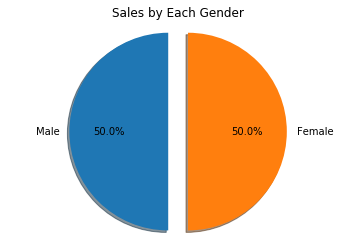

<Figure size 432x288 with 0 Axes>

In [22]:
labels=['Male','Female']
values=[(customer["Gender"]== 'M').count(),(customer["Gender"]== 'F').count()]
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Sales by Each Gender")

plt.show()
plt.savefig("Sales by Each Gender")

### Merging Transaction and Customer Dataset

In [23]:
final=pd.merge(transac,customer,on=['cust_id'])

In [24]:
final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,Age
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5,39.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5,39.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,1981-09-26,M,5,39.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,1981-09-26,M,5,39.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,1981-09-26,M,5,39.0
5,29258453508,270384,27-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,1973-11-05,F,8,47.0
6,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,1973-11-05,F,8,47.0
7,92734514344,270384,26-10-2013,1,4,2,1362,286.020,3010.020,TeleShop,1973-11-05,F,8,47.0
8,865952996,270384,06-08-2013,12,6,2,86,18.060,190.060,MBR,1973-11-05,F,8,47.0
9,4116651679,270384,06-08-2013,6,5,1,1343,141.015,1484.015,TeleShop,1973-11-05,F,8,47.0


In [25]:
final['Year']=pd.DatetimeIndex(final['tran_date']).year
final['Year'].astype(int)
final.dtypes

transaction_id               int64
cust_id                      int64
tran_date                   object
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
DOB                 datetime64[ns]
Gender                      object
city_code                    int32
Age                        float64
Year                         int64
dtype: object

## PS-2  Customers in Each City

In [26]:
labels=final['city_code'].unique()
labels=np.sort(labels).astype(str).tolist()
labels

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [27]:
total_cust=final['city_code'].value_counts()
total_cust=final.groupby('city_code')['city_code'].count()
total_cust=total_cust.astype(int)
total_cust

city_code
1     2258
2     2265
3     2411
4     2422
5     2360
6     2123
7     2356
8     2330
9     2178
10    2333
Name: city_code, dtype: int32

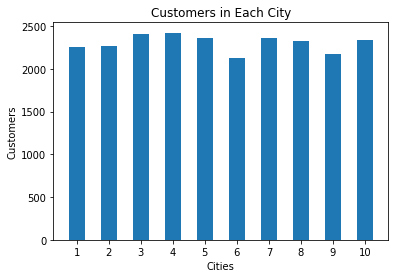

<Figure size 432x288 with 0 Axes>

In [28]:
plt.bar(labels,total_cust,width=0.5)
plt.title("Customers in Each City") 
plt.ylabel("Customers") 
plt.xlabel("Cities") 
plt.show()
plt.savefig("Customers in each city")


## PS-3 City-wise Sales

In [29]:
total_amount=final.groupby('city_code')['total_amt'].sum()
total_amount.astype(int)
total_amount

city_code
1     5945168.515
2     6032912.145
3     6283928.365
4     6227323.635
5     6080283.495
6     5408389.350
7     6166563.000
8     6092357.830
9     5825093.690
10    6227249.600
Name: total_amt, dtype: float64

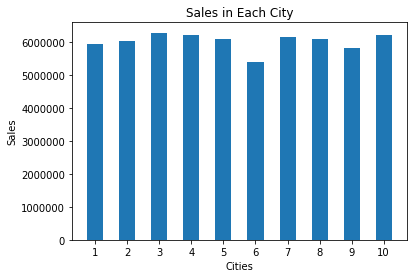

In [30]:
plt.bar(labels,total_amount,width=0.5)
plt.title("Sales in Each City") 
plt.ylabel("Sales") 
plt.xlabel("Cities") 
plt.show()

## PS-4 Year wise sales

In [31]:
year_lab=final['Year'].unique()
year_lab.sort()
year_lab=year_lab.tolist()
year_lab
year_lab=np.array(year_lab,dtype=str).tolist()
year_lab

['2011', '2012', '2013', '2014']

In [32]:
year_total_amount=final.groupby('Year')['total_amt'].sum().astype(int)

year_total_amount

Year
2011    18348098
2012    19695659
2013    19416720
2014     2828791
Name: total_amt, dtype: int32

<BarContainer object of 4 artists>

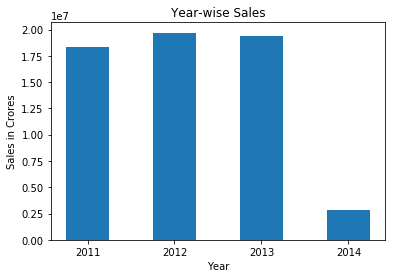

In [33]:
x=year_lab
y=year_total_amount
plt.title("Year-wise Sales")
plt.ylabel("Sales in Crores") 
plt.xlabel("Year") 
plt.bar(x, y,width=0.5)

### Merging all the datasets

In [34]:
final_prod=pd.merge(final,prod,on=['prod_cat_code','prod_subcat_code'])

In [35]:
final_prod

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,Age,Year,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5,39.0,2014,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5,39.0,2014,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,1981-08-06,M,3,39.0,2013,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,4,284,119.280,1255.280,Flagship store,1986-10-13,M,1,34.0,2013,Clothing,Women
4,92814475704,267750,07-08-2013,1,1,4,284,119.280,1255.280,Flagship store,1986-10-13,M,1,34.0,2013,Clothing,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,1970-06-26,F,10,50.0,2011,Clothing,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,1983-08-10,M,2,37.0,2012,Clothing,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,1989-12-24,M,8,30.0,2012,Clothing,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,1984-07-15,F,8,36.0,2012,Clothing,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,1982-07-08,F,9,38.0,2011,Clothing,Women


# PS-5 Product Category wise Sales

In [36]:
prod_cat_cost=final_prod.groupby('prod_cat')['total_amt'].sum().astype(int).tolist()
prod_cat_cost

[5242089, 15933940, 7894314, 12953947, 7726915, 10538062]

In [37]:
final_prod.groupby('prod_cat')['total_amt'].sum().astype(int)

prod_cat
Bags                 5242089
Books               15933940
Clothing             7894314
Electronics         12953947
Footwear             7726915
Home and kitchen    10538062
Name: total_amt, dtype: int32

In [38]:
prod_list=final_prod['prod_cat'].unique().tolist()
prod_list.sort()
prod_list

['Bags', 'Books', 'Clothing', 'Electronics', 'Footwear', 'Home and kitchen']

Text(0.5, 0, 'Sales in Crores')

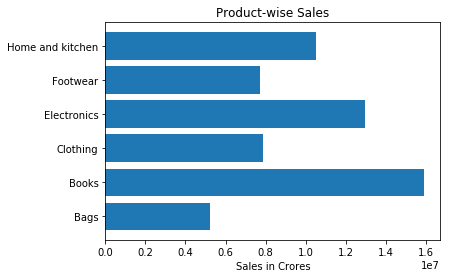

In [39]:
plt.barh(prod_list,prod_cat_cost)
plt.title("Product-wise Sales")
plt.xlabel("Sales in Crores")


## PS-6 Store-wise Sales

In [40]:
store_type=final_prod['Store_type'].unique().tolist()
store_type.sort()
store_type

['Flagship store', 'MBR', 'TeleShop', 'e-Shop']

In [41]:
store_sales=final_prod.groupby('Store_type')['total_amt'].sum().astype(int).tolist()
store_sales

[12096664, 12135401, 11517713, 24539489]

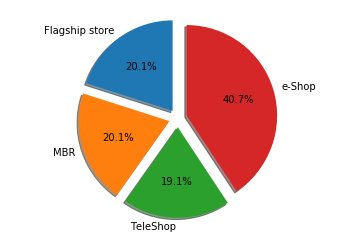

In [42]:
labels=store_type
values=store_sales
explode = (0.1, 0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## PS-7 Average amount spent on product Category

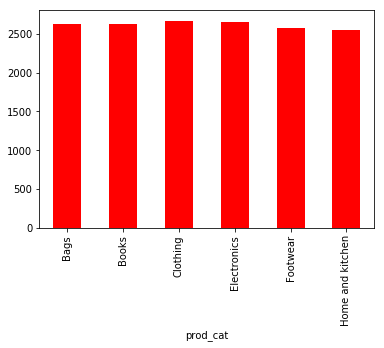

In [43]:
final_prod.groupby(['prod_cat'])['total_amt'].mean().plot.bar(color="red")

## PS-8 Age vs. Product Category vs. Total Amount – 3 variables at a time

In [44]:
bins=[0,10, 20,30, 40,50, 60,70, 80,90, 100]
final_prod['Age group'] = pd.cut(final_prod['Age'], bins, labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])
ret=pd.pivot_table(final_prod, values='total_amt', index='Age group', columns='prod_cat')
ret

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Age group,,,,,,
21-30,2543.879349,2630.952917,2743.125477,2618.933497,2697.328021,2604.052986
31-40,2665.844772,2636.040559,2658.048685,2636.059863,2527.614915,2573.477607
41-50,2609.287983,2618.184398,2659.216200,2666.231584,2591.218303,2520.239357


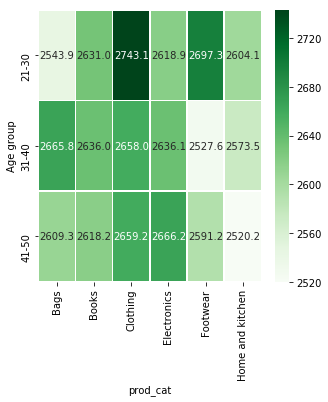

In [45]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(ret, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

## PS-9 Different Product brought by respective Gender

In [46]:
final_prod.groupby(['prod_cat'])['total_amt'].sum()

prod_cat
Bags                5.242089e+06
Books               1.593394e+07
Clothing            7.894314e+06
Electronics         1.295395e+07
Footwear            7.726916e+06
Home and kitchen    1.053806e+07
Name: total_amt, dtype: float64

In [47]:
sales_gender_prodcat=pd.pivot_table(final_prod, values='total_amt', index='prod_cat', columns='Gender')
sales_gender_prodcat

Gender,F,M
prod_cat,,
Bags,2689.018612,2561.520000
Books,2650.659686,2605.825189
Clothing,2687.374590,2652.952862
Electronics,2593.219796,2695.528738
Footwear,2567.024127,2588.111593
Home and kitchen,2572.688819,2536.642043


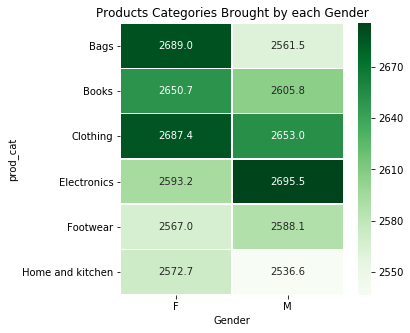

In [48]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(sales_gender_prodcat, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
ax.set_title("Products Categories Brought by each Gender")
plt.show()

## Mode of the total Amount.

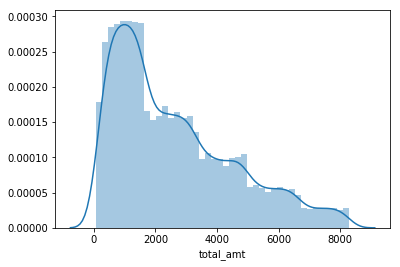

In [50]:
sns.distplot(final_prod['total_amt'])

In [51]:
final_prod['total_amt'].mode()

0    676.26
dtype: float64

### Most Customers spent about Rs 676.26 